In [1]:
import ROOT
import numpy as np
import root_numpy as rnp
from plotly.offline import init_notebook_mode, iplot

/usr/local/lib/python2.7/dist-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.13.1 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
NFLOORS = 18
NSTRING = 115
PMTSPERDOM = 31
pmtstot = NFLOORS * NSTRING * PMTSPERDOM
ndoms = NFLOORS * NSTRING

coord_origin = np.asarray((13.887,6.713,405.932))

### execute this cell to load files on server

In [3]:
detfile = "utilities/km3net_jul13_90m.detx"
nuefile = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile = "utilities/km3_v4_numucc_1_B.evt.aa.root"

In [4]:
# run this cell for multiple input files
nuefile1 = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile1 = "utilities/km3_v4_numucc_1_B.evt.aa.root"
nuefile2 = "utilities/km3_v4_nuecc_2.evt.JTE.aa.root"
numufile2 = "utilities/km3_v4_numucc_2.evt.JTE.aa.root"
nuefile3 = "utilities/km3_v4_nuecc_3.evt.JTE.aa.root"
numufile3 = "utilities/km3_v4_numucc_3.evt.JTE.aa.root"

In [4]:
from load_trees import load_trees

### doms and pmts hit for numu and nue files

In [6]:
# 1 file per type
ch_id_numu, dom_id_numu, trig_numu, times_numu = load_trees(numufile)
ch_id_nue, dom_id_nue, trig_nue, times_nue = load_trees(nuefile)

####  multiple input files

In [7]:
ch_id_numu1, dom_id_numu1, trig_numu1, times_numu1 = load_trees(numufile1)
ch_id_nue1, dom_id_nue1, trig_nue1, times_nue1 = load_trees(nuefile1)

In [9]:
ch_id_numu2, dom_id_numu2, trig_numu2, times_numu2 = load_trees(numufile2)
ch_id_nue2, dom_id_nue2, trig_nue2, times_nue2 = load_trees(nuefile2)

In [11]:
ch_id_numu3, dom_id_numu3, trig_numu3, times_numu3 = load_trees(numufile3)
ch_id_nue3, dom_id_nue3, trig_nue3, times_nue3 = load_trees(nuefile3)

### create Data structure with the id of the hit DOMs and the discretized times

In [18]:
from timeslices import tslices
from timeslices import tslices_multi_files

In [19]:
timeslice = tslices(times_numu, times_nue)

(49997887.0, 49993098.0, 50000747.0, 50004225.0, 49993098.0, 50004225.0)


In [13]:
timeslice = tslices_multi_files(times_numu1, times_nue1, times_numu2, times_nue2, times_numu3, times_nue3)

(49993098.0, 50004225.0)


In [225]:
timeslice

array([ 49993098.,  49993248.,  49993398.,  49993548.,  49993698.,
        49993848.,  49993998.,  49994148.,  49994298.,  49994448.,
        49994598.,  49994748.,  49994898.,  49995048.,  49995198.,
        49995348.,  49995498.,  49995648.,  49995798.,  49995948.,
        49996098.,  49996248.,  49996398.,  49996548.,  49996698.,
        49996848.,  49996998.,  49997148.,  49997298.,  49997448.,
        49997598.,  49997748.,  49997898.,  49998048.,  49998198.,
        49998348.,  49998498.,  49998648.,  49998798.,  49998948.,
        49999098.,  49999248.,  49999398.,  49999548.,  49999698.,
        49999848.,  49999998.,  50000148.,  50000298.,  50000448.,
        50000598.,  50000748.,  50000898.,  50001048.,  50001198.,
        50001348.,  50001498.,  50001648.,  50001798.,  50001948.,
        50002098.,  50002248.,  50002398.,  50002548.,  50002698.,
        50002848.,  50002998.,  50003148.,  50003298.,  50003448.,
        50003598.,  50003748.,  50003898.,  50004048.,  500041

In [226]:
timeslice.shape[0]

76

In [9]:
from data_preparation import Xy_creation

In [10]:
X_numu, Y_numu  = Xy_creation(timeslice, dom_id_numu, trig_numu, times_numu)

In [13]:
X_nue, Y_nue = Xy_creation(timeslice, dom_id_nue, trig_nue, times_nue)

### alternative definition of data structure
#### DOMs are now organized in strings and floors
### let"s try this with a convolutional neural network!

In [20]:
from data_preparation import Xy_creation_fl_str

In [21]:
X_numu, Y_numu = Xy_creation_fl_str(timeslice, dom_id_numu, trig_numu, times_numu, 'numu')

In [22]:
X_nue, Y_nue = Xy_creation_fl_str(timeslice, dom_id_nue, trig_nue, times_nue, 'nue')

#### mutiple files

In [15]:
X_numu1, Y_numu1 = Xy_creation_fl_str(timeslice, dom_id_numu1, trig_numu1, times_numu1, 'numu')

In [16]:
X_nue1, Y_nue1 = Xy_creation_fl_str(timeslice, dom_id_nue1, trig_nue1, times_nue1, 'nue')

In [17]:
X_numu2, Y_numu2 = Xy_creation_fl_str(timeslice, dom_id_numu2, trig_numu2, times_numu2, 'numu')
X_nue2, Y_nue2 = Xy_creation_fl_str(timeslice, dom_id_nue2, trig_nue2, times_nue2, 'nue')
X_numu3, Y_numu3 = Xy_creation_fl_str(timeslice, dom_id_numu3, trig_numu3, times_numu3, 'numu')
X_nue3, Y_nue3 = Xy_creation_fl_str(timeslice, dom_id_nue3, trig_nue3, times_nue3, 'nue')

In [23]:
X_numu.shape

(1541, 75, 115, 18)

In [24]:
X_nue.shape

(1183, 75, 115, 18)

### check the shape of the data set 

In [25]:
#single file
print('X_numu: ', X_numu.shape, 'X_nue: ', X_nue.shape, 'Y_numu: ', Y_numu.shape, 'Y_nue: ', Y_nue.shape)

('X_numu: ', (1541, 75, 115, 18), 'X_nue: ', (1183, 75, 115, 18), 'Y_numu: ', (1541,), 'Y_nue: ', (1183,))


In [18]:
print('X_numu: ', X_numu1.shape, 'X_nue: ', X_nue1.shape, 'Y_numu: ', Y_numu1.shape, 'Y_nue: ', Y_nue1.shape)

('X_numu: ', (1541, 75, 115, 18), 'X_nue: ', (1183, 75, 115, 18), 'Y_numu: ', (1541,), 'Y_nue: ', (1183,))


In [19]:
print('X_numu: ', X_numu2.shape, 'X_nue: ', X_nue2.shape, 'Y_numu: ', Y_numu2.shape, 'Y_nue: ', Y_nue2.shape)

('X_numu: ', (1609, 75, 115, 18), 'X_nue: ', (1220, 75, 115, 18), 'Y_numu: ', (1609,), 'Y_nue: ', (1220,))


In [20]:
print('X_numu: ', X_numu3.shape, 'X_nue: ', X_nue3.shape, 'Y_numu: ', Y_numu3.shape, 'Y_nue: ', Y_nue3.shape)

('X_numu: ', (1613, 75, 115, 18), 'X_nue: ', (1234, 75, 115, 18), 'Y_numu: ', (1613,), 'Y_nue: ', (1234,))


### append nue to numu data, without mixing : from now on, data will be X an Y

####  single file

In [26]:
X = np.vstack((X_numu, X_nue))

In [27]:
Y = np.concatenate((Y_numu, Y_nue))

#### multiple files 

In [21]:
X_numu = np.vstack((X_numu1, X_numu2, X_numu3))
X_nue = np.vstack((X_nue1, X_nue2, X_nue3))

In [22]:
X = np.vstack((X_numu, X_nue))

In [23]:
Y_numu = np.concatenate((Y_numu1, Y_numu2, Y_numu3))
Y_nue = np.concatenate((Y_nue1, Y_nue2, Y_nue3))

In [24]:
Y = np.concatenate((Y_numu, Y_nue))

In [28]:
X.shape

(2724, 75, 115, 18)

In [29]:
Y.shape

(2724,)

In [34]:
#save to output file X and Y
#np.save('X_matrix.npy', X)

In [36]:
#used later in cross validation
#y_numu_categ = np_utils.to_categorical(Y_numu, 2)
#y_nue_categ = np_utils.to_categorical(Y_nue, 2)

In [37]:
#y = np.concatenate((y_numu_categ, y_nue_categ))

### Use `sklearn` to split train and test data

In [52]:
#theano

In [15]:
import os
os.environ["THEANO_FLAGS"]= "mode=FAST_RUN, device=gpu,floatX=float32"
import theano
import keras

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 780 Ti (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [53]:
#start here if using tensorflow

In [30]:
import keras
from sklearn.model_selection import train_test_split

from keras.utils import np_utils

Using TensorFlow backend.


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [32]:
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'Y_train: ', Y_train.shape, 'Y_test: ', Y_test.shape)

('X_train: ', (2043, 75, 115, 18), 'X_test: ', (681, 75, 115, 18), 'Y_train: ', (2043,), 'Y_test: ', (681,))


### Training with Cross Validation

In [33]:
from sklearn.model_selection import StratifiedKFold

In [34]:
skf = StratifiedKFold(n_splits=5)

In [35]:
best_validation_acc = 0.0
best_model = None

In [21]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy

In [54]:
# fully connected model. To be used with different dataset (from CNN), because data must be reshaped to 2D
def dense_model():
    ## TRY different activations, e.g. tanh, sigmoid.
    model = Sequential()
    model.add(Dense(2070, input_shape=((Xtrain.shape[1], Xtrain.shape[2])), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2070, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

####  data format for keras (differen in `th` and `tf`)

In [22]:
#tensorflow
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)


In [36]:
# theano
img_channel = X_train.shape[1]
img_rows = X_train.shape[2]
img_cols = X_train.shape[3]
input_shape = (img_channel, img_rows, img_cols)


In [37]:
X_train.shape

(2043, 75, 115, 18)

In [38]:
input_shape

(75, 115, 18)

In [26]:
def cnn_model():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [24]:
def cnn_model_deep():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
    model.add(Dropout(0.25))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [41]:
def cnn_model_deep2():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Convolution2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Convolution2D(32, (1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [30]:
def cnn_model_deep3():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    model.add(Dropout(0.25))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dense(2070, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(2070, activation='tanh'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()


    return model

In [145]:
import keras
from keras.models import Sequential
from keras.layers.core import Dropout, Activation, Flatten, Dense
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.callbacks import EarlyStopping
def cnn_1d():
    
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Convolution1D(128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Convolution1D(64, kernel_size=3, activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Convolution1D(32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.summary()
    return model

### ADADELTA: An Adaptive Learning Rate Method

Matthew D. Zeiler
(Submitted on 22 Dec 2012)
We present a novel per-dimension learning rate method for gradient descent called ADADELTA. The method dynamically adapts over time using only first order information and has minimal computational overhead beyond vanilla stochastic gradient descent. The method requires no manual tuning of a learning rate and appears robust to noisy gradient information, different model architecture choices, various data modalities and selection of hyperparameters. We show promising results compared to other methods on the MNIST digit classification task using a single machine and on a large scale voice dataset in a distributed cluster environment.

`keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)`

In [57]:
create_nn_model = dense_model

In [27]:
create_nn_model = cnn_model

In [25]:
create_nn_model = cnn_model_deep

In [42]:
create_nn_model = cnn_model_deep2

In [31]:
create_nn_model = cnn_model_deep3

In [146]:
create_nn_model = cnn_1d

In [62]:
X_train.shape

(2043, 75, 115, 18)

In [63]:
# reshape data for FC network
X_FC_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2]*X_train.shape[3])
X_FC_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2]*X_test.shape[3])

In [66]:
#Fully connecter netword( w old dataset - ndoms not splitted in strings and floors)

for i, (train_index, validation_index) in enumerate(skf.split(X_FC_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_FC_train[train_index], X_FC_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=115,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_FC_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
Train on 1634 samples, validate on 409 samples
Epoch 1/20


ValueError: GpuElemwise. Input dimension mis-match. Input 1 (indices start at 0) has shape[1] == 2070, but the output's size on that axis is 75.
Apply node that caused the error: GpuElemwise{Add}[(0, 0)](GpuReshape{3}.0, GpuDimShuffle{x,0,x}.0)
Toposort index: 72
Inputs types: [CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, (True, False, True))]
Inputs shapes: [(115, 75, 2070), (1, 2070, 1)]
Inputs strides: [(155250, 2070, 1), (0, 1, 0)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[GpuElemwise{Composite{(i0 + Abs(i0))},no_inplace}(GpuElemwise{Add}[(0, 0)].0), GpuElemwise{Composite{((i0 * Composite{((i0 * i1 * i2) + i3)}(i1, i2, i3, i4)) + (i0 * Composite{((i0 * i1 * i2) + i3)}(i1, i2, i3, i4) * sgn(i5)))}}[(0, 2)](CudaNdarrayConstant{[[[ 0.5]]]}, CudaNdarrayConstant{[[[ 1.25]]]}, if{inplace,gpu}.0, GpuElemwise{Composite{Cast{float32}(LT(i0, i1))}}[(0, 0)].0, if{inplace,gpu}.0, GpuElemwise{Add}[(0, 0)].0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [57]:
#cnn first attempt
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 72, 113, 128)      20864     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 70, 111, 64)       73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 55, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 35, 55, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 33, 53, 32)        18464     
_________________________________________________________________
dropout_16 (Dropout)         (None, 33, 53, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 51, 32)        9248      
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 75s - loss: 0.6596 - acc: 0.5894 - val_loss: 0.5972 - val_acc: 0.5795
Epoch 2/20
1634/1634 [==============================] - 75s - loss: 0.5214 - acc: 0.7528 - val_loss: 0.3636 - val_acc: 0.8924
Epoch 3/20
1634/1634 [==============================] - 76s - loss: 0.4766 - acc: 0.8299 - val_loss: 0.3922 - val_acc: 0.8215
Epoch 4/20
1634/1634 [==============================] - 75s - loss: 0.3340 - acc: 0.8641 - val_loss: 0.3410 - val_acc: 0.8557
Epoch 5/20
1634/1634 [==============================] - 76s - loss: 0.3060 - acc: 0.8703 - val_loss: 0.3297 - val_acc: 0.8533
Epoch 6/20
1634/1634 [==============================] - 75s - loss: 0.2792 - acc: 0.8862 - val_loss: 0.3067 - val_acc: 0.8826
Epoch 7/20
1634/1634 [==============================] - 76s - loss: 0.2786 - acc: 0.9002 - val_loss: 0.3080 - val_acc: 0.8826
Epoch 8/20
1634/1634 [==============================] - 75s - loss: 0.2

1636/1636 [==============================] - 75s - loss: 0.1699 - acc: 0.9340 - val_loss: 0.3184 - val_acc: 0.8968
Epoch 1/20
1636/1636 [==============================] - 69s - loss: 0.1974 - acc: 0.9211    
Epoch 2/20
1636/1636 [==============================] - 69s - loss: 0.1954 - acc: 0.9254    
Epoch 3/20
1636/1636 [==============================] - 69s - loss: 0.1918 - acc: 0.9285    
Epoch 4/20
1636/1636 [==============================] - 69s - loss: 0.1842 - acc: 0.9236    
Epoch 5/20
1636/1636 [==============================] - 69s - loss: 0.1771 - acc: 0.9340    
Epoch 6/20
1636/1636 [==============================] - 69s - loss: 0.1753 - acc: 0.9267    
Epoch 7/20
1636/1636 [==============================] - 69s - loss: 0.1762 - acc: 0.9315    
Epoch 8/20
1636/1636 [==============================] - 70s - loss: 0.1682 - acc: 0.9407    
Epoch 9/20
1636/1636 [==============================] - 69s - loss: 0.1637 - acc: 0.9407    
Epoch 10/20
1636/1636 [=========================

0.92364170337738616

### `accuracy_score(Y_test, cls_predictions)`:0.92364170337738616 !

In [36]:
#cnn first attempt - new dataset
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 73, 113, 128)      20864     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 111, 64)       73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 55, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 55, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 53, 32)        18464     
_________________________________________________________________
dropout_4 (Dropout)          (None, 33, 53, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 51, 32)        9248      
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 73s - loss: 0.6541 - acc: 0.6206 - val_loss: 0.5993 - val_acc: 0.7188
Epoch 2/20
1634/1634 [==============================] - 74s - loss: 0.4717 - acc: 0.7913 - val_loss: 0.3881 - val_acc: 0.8264
Epoch 3/20
1634/1634 [==============================] - 74s - loss: 0.3699 - acc: 0.8464 - val_loss: 0.3855 - val_acc: 0.8533
Epoch 4/20
1634/1634 [==============================] - 74s - loss: 0.3585 - acc: 0.8641 - val_loss: 0.3291 - val_acc: 0.8875
Epoch 5/20
1634/1634 [==============================] - 74s - loss: 0.3003 - acc: 0.8819 - val_loss: 0.2853 - val_acc: 0.8802
Epoch 6/20
1634/1634 [==============================] - 74s - loss: 0.2622 - acc: 0.9009 - val_loss: 0.2897 - val_acc: 0.8924
Epoch 7/20
1634/1634 [==============================] - 74s - loss: 0.2433 - acc: 0.9064 - val_loss: 0.2698 - val_acc: 0.8900
Epoch 8/20
1634/1634 [==============================] - 74s - loss: 0.2

1636/1636 [==============================] - 74s - loss: 0.1644 - acc: 0.9383 - val_loss: 0.2857 - val_acc: 0.9115
Epoch 1/20
1636/1636 [==============================] - 68s - loss: 0.1837 - acc: 0.9260    
Epoch 2/20
1636/1636 [==============================] - 68s - loss: 0.1813 - acc: 0.9273    
Epoch 3/20
1636/1636 [==============================] - 68s - loss: 0.1717 - acc: 0.9309    
Epoch 4/20
1636/1636 [==============================] - 68s - loss: 0.1691 - acc: 0.9334    
Epoch 5/20
1636/1636 [==============================] - 68s - loss: 0.1609 - acc: 0.9328    
Epoch 6/20
1636/1636 [==============================] - 68s - loss: 0.1592 - acc: 0.9328    
Epoch 7/20
1636/1636 [==============================] - 68s - loss: 0.1511 - acc: 0.9383    
Epoch 8/20
1636/1636 [==============================] - 68s - loss: 0.1465 - acc: 0.9419    
Epoch 9/20
1636/1636 [==============================] - 68s - loss: 0.1481 - acc: 0.9438    
Epoch 10/20
1636/1636 [=========================

0.90748898678414092

### 0.90748898678414092

In [31]:
#cnn first attempt - new dataset + theano (to use " channel_first ")
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 53, 5)         18464     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 53, 5)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 51, 3)         9248      
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 5s - loss: 0.6889 - acc: 0.5386 - val_loss: 0.6793 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 5s - loss: 0.6834 - acc: 0.5673 - val_loss: 0.6794 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 5s - loss: 0.6697 - acc: 0.5673 - val_loss: 0.6573 - val_acc: 0.5672
Epoch 4/20
1634/1634 [==============================] - 5s - loss: 0.6350 - acc: 0.5741 - val_loss: 0.5954 - val_acc: 0.5697
Epoch 5/20
1634/1634 [==============================] - 5s - loss: 0.5828 - acc: 0.6971 - val_loss: 0.5034 - val_acc: 0.8215
Epoch 6/20
1634/1634 [==============================] - 5s - loss: 0.5623 - acc: 0.8078 - val_loss: 0.4309 - val_acc: 0.8289
Epoch 7/20
1634/1634 [==============================] - 5s - loss: 0.3775 - acc: 0.8556 - val_loss: 0.4140 - val_acc: 0.8068
Epoch 8/20
1634/1634 [==============================] - 5s - loss: 0.3802 - ac

1636/1636 [==============================] - 4s - loss: 0.1597 - acc: 0.9438     
Epoch 2/20
1636/1636 [==============================] - 4s - loss: 0.1580 - acc: 0.9395     
Epoch 3/20
1636/1636 [==============================] - 4s - loss: 0.1518 - acc: 0.9401     
Epoch 4/20
1636/1636 [==============================] - 4s - loss: 0.1443 - acc: 0.9474     
Epoch 5/20
1636/1636 [==============================] - 4s - loss: 0.1349 - acc: 0.9517     
Epoch 6/20
1636/1636 [==============================] - 4s - loss: 0.1537 - acc: 0.9450     
Epoch 7/20
1636/1636 [==============================] - 4s - loss: 0.1380 - acc: 0.9456     
Epoch 8/20
1636/1636 [==============================] - 4s - loss: 0.1308 - acc: 0.9542     
Epoch 9/20
1636/1636 [==============================] - 4s - loss: 0.1274 - acc: 0.9480     
Epoch 10/20
1636/1636 [==============================] - 4s - loss: 0.1316 - acc: 0.9505     
Epoch 11/20
1636/1636 [==============================] - 4s - loss: 0.1252 - acc

0.92804698972099853

### 0.92804698972099853

In [171]:
#cnn first attempt - new dataset + theano (to use " channel_first ")
#dropouts changed to 0.1 and 0.25 instead of 0.25 and 0.50
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
dropout_57 (Dropout)         (None, 32, 53, 5)         0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 32, 51, 3)         9248      
________

INFO (theano.gof.compilelock): Refreshing lock /home/cdesio/.theano/compiledir_Linux-4.2--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir/lock


Total params: 197,826
Trainable params: 197,826
Non-trainable params: 0
_________________________________________________________________
Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 4s - loss: 0.6867 - acc: 0.5563 - val_loss: 0.6803 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 4s - loss: 0.6768 - acc: 0.5673 - val_loss: 0.6645 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 4s - loss: 0.6461 - acc: 0.5728 - val_loss: 0.6151 - val_acc: 0.5672
Epoch 4/20
1634/1634 [==============================] - 4s - loss: 0.5642 - acc: 0.6683 - val_loss: 0.5145 - val_acc: 0.8289
Epoch 5/20
1634/1634 [==============================] - 4s - loss: 0.4518 - acc: 0.8152 - val_loss: 0.4690 - val_acc: 0.8484
Epoch 6/20
1634/1634 [==============================] - 5s - loss: 0.3765 - acc: 0.8507 - val_loss: 0.3746 - val_acc: 0.8582
Epoch 7/20
1634/1634 [==============================] - 5s - loss

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 5s - loss: 0.6867 - acc: 0.5661 - val_loss: 0.6782 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 5s - loss: 0.6701 - acc: 0.5673 - val_loss: 0.6573 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 5s - loss: 0.6338 - acc: 0.5698 - val_loss: 0.5799 - val_acc: 0.5819
Epoch 4/20
1634/1634 [==============================] - 5s - loss: 0.5614 - acc: 0.7368 - val_loss: 0.4841 - val_acc: 0.7897
Epoch 5/20
1634/1634 [==============================] - 5s - loss: 0.4285 - acc: 0.8299 - val_loss: 0.3890 - val_acc: 0.8582
Epoch 6/20
1634/1634 [==============================] - 5s - loss: 0.3475 - acc: 0.8531 - val_loss: 0.3799 - val_acc: 0.8435
Epoch 7/20
1634/1634 [==============================] - 5s - loss: 0.3107 - acc: 0.8819 - val_loss: 0.3611 - val_acc: 0.8826
Epoch 8/20
1634/1634 [==============================] - 5s - loss: 0.2865 - ac

1636/1636 [==============================] - 5s - loss: 0.6866 - acc: 0.5544 - val_loss: 0.6793 - val_acc: 0.5676
Epoch 2/20
1636/1636 [==============================] - 5s - loss: 0.6737 - acc: 0.5672 - val_loss: 0.6599 - val_acc: 0.5676
Epoch 3/20
1636/1636 [==============================] - 5s - loss: 0.6353 - acc: 0.5672 - val_loss: 0.5984 - val_acc: 0.5676
Epoch 4/20
1636/1636 [==============================] - 5s - loss: 0.5583 - acc: 0.6546 - val_loss: 0.4905 - val_acc: 0.8231
Epoch 5/20
1636/1636 [==============================] - 5s - loss: 0.4478 - acc: 0.8123 - val_loss: 0.4053 - val_acc: 0.8452
Epoch 6/20
1636/1636 [==============================] - 5s - loss: 0.3415 - acc: 0.8594 - val_loss: 0.3812 - val_acc: 0.8747
Epoch 7/20
1636/1636 [==============================] - 5s - loss: 0.3157 - acc: 0.8747 - val_loss: 0.3219 - val_acc: 0.8821
Epoch 8/20
1636/1636 [==============================] - 5s - loss: 0.2952 - acc: 0.8845 - val_loss: 0.3154 - val_acc: 0.9017
Epoch 9/20


0.91336270190895741

### 0.91336270190895741

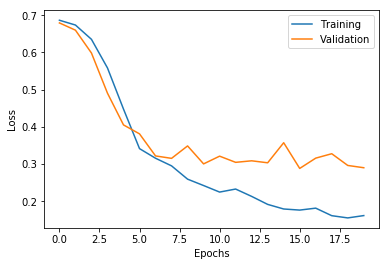

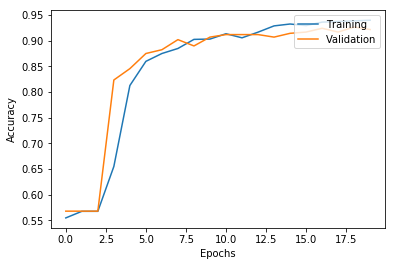

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='upper right')

In [194]:
keras.backend.image_data_format()

'channels_first'

In [254]:
X_train.shape

(6300, 75, 115, 18)

In [ ]:
#cnn first attempt - new dataset + theano (to use " channel_first ")
#theano on gpux01
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 53, 5)         18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 53, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 51, 3)         9248      
________

In [28]:
#cnn_model - new dataset + tensorflow (with data_format" channel_first ")
# dropout removed
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 51, 3)         9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4896)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 9794      
Total pa

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 10s - loss: 0.6862 - acc: 0.5612 - val_loss: 0.6757 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 10s - loss: 0.6723 - acc: 0.5673 - val_loss: 0.6589 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 10s - loss: 0.6339 - acc: 0.5679 - val_loss: 0.5886 - val_acc: 0.5746
Epoch 4/20
1634/1634 [==============================] - 10s - loss: 0.5617 - acc: 0.6946 - val_loss: 0.5002 - val_acc: 0.8240
Epoch 5/20
1634/1634 [==============================] - 10s - loss: 0.4284 - acc: 0.8513 - val_loss: 0.4126 - val_acc: 0.8215
Epoch 6/20
1634/1634 [==============================] - 10s - loss: 0.3696 - acc: 0.8537 - val_loss: 0.3845 - val_acc: 0.8606
Epoch 7/20
1634/1634 [==============================] - 10s - loss: 0.3051 - acc: 0.8776 - val_loss: 0.3695 - val_acc: 0.8606
Epoch 8/20
1634/1634 [==============================] - 10s - loss: 0.2

0.91042584434654916

### 0.91042584434654916

In [30]:
#cnn first attempt - new dataset + theano (to use " channel_first ")
# dropout removed (20170720)
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 51, 3)         9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 4896)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 9794      
Total pa

dense_5 (Dense)              (None, 2)                 9794      
Total params: 197,826
Trainable params: 197,826
Non-trainable params: 0
_________________________________________________________________
Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 14s - loss: 0.6864 - acc: 0.5606 - val_loss: 0.6715 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 14s - loss: 0.6279 - acc: 0.6230 - val_loss: 0.5245 - val_acc: 0.7995
Epoch 3/20
1634/1634 [==============================] - 14s - loss: 0.4183 - acc: 0.8366 - val_loss: 0.3952 - val_acc: 0.8557
Epoch 4/20
1634/1634 [==============================] - 14s - loss: 0.3176 - acc: 0.8770 - val_loss: 0.3708 - val_acc: 0.8900
Epoch 5/20
1634/1634 [==============================] - 14s - loss: 0.2663 - acc: 0.9009 - val_loss: 0.3424 - val_acc: 0.8949
Epoch 6/20
1634/1634 [==============================] - 14s - loss: 0.2484 - acc: 0.9051 - val_loss: 0.3408 - val_acc: 

0.92070484581497802

### 0.92070484581497802

In [26]:
#cnn deep attempt - new dataset + theano (to use " channel_first ")
# (conv conv maxp drop) X2 + dense (20170720)
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 51, 3)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 25, 1)         0         
________

1634/1634 [==============================] - 14s - loss: 0.2244 - acc: 0.9137 - val_loss: 0.1990 - val_acc: 0.9218
Epoch 12/20
1634/1634 [==============================] - 14s - loss: 0.2237 - acc: 0.9174 - val_loss: 0.1948 - val_acc: 0.9071
Epoch 13/20
1634/1634 [==============================] - 14s - loss: 0.2025 - acc: 0.9253 - val_loss: 0.2015 - val_acc: 0.9218
Epoch 14/20
1634/1634 [==============================] - 14s - loss: 0.2030 - acc: 0.9266 - val_loss: 0.2057 - val_acc: 0.9071
Epoch 15/20
1634/1634 [==============================] - 14s - loss: 0.1968 - acc: 0.9296 - val_loss: 0.2505 - val_acc: 0.9389
Epoch 16/20
1634/1634 [==============================] - 14s - loss: 0.1884 - acc: 0.9284 - val_loss: 0.1964 - val_acc: 0.9120
Epoch 17/20
1634/1634 [==============================] - 14s - loss: 0.1804 - acc: 0.9321 - val_loss: 0.1886 - val_acc: 0.9389
Epoch 18/20
1634/1634 [==============================] - 14s - loss: 0.1762 - acc: 0.9302 - val_loss: 0.2730 - val_acc: 0.9

0.89133627019089579

In [26]:
#Try cnn_deep with theano - MaxPooling removed
## (conv conv maxp drop) X2 (20170720))
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=64,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=64, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 53, 5)         18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 51, 3)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 25, 1)         0         
________

KeyboardInterrupt: 

In [265]:
#Try cnn_deep with theano - MaxPooling
#cnn deep - new dataset + theano (to use " channel_first ")
num_classes = 2
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print(i+1)
    #print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

1


ValueError: ('The specified size contains a dimension with value <= 0', (-2016, 2))

In [197]:
#Try cnn_deep with theano - MaxPooling removed
#cnn first attempt - new dataset + theano (to use " channel_first ")
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

INFO (theano.gof.compilelock): Refreshing lock /home/cdesio/.theano/compiledir_Linux-4.2--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir/lock


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 64, 111, 14)       73792     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 64, 109, 12)       36928     
_________________________________________________________________
dropout_70 (Dropout)         (None, 64, 109, 12)       0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 107, 10)       18464     
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 32, 105, 8)        9248      
_________________________________________________________________
dropout_71 (Dropout)         (None, 32, 105, 8)        0         
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 6s - loss: 0.6897 - acc: 0.5557 - val_loss: 0.6831 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 7s - loss: 0.6814 - acc: 0.5673 - val_loss: 0.6740 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 7s - loss: 0.6725 - acc: 0.5673 - val_loss: 0.6419 - val_acc: 0.5672
Epoch 4/20
1634/1634 [==============================] - 7s - loss: 0.6340 - acc: 0.5679 - val_loss: 0.5674 - val_acc: 0.5697
Epoch 5/20
1634/1634 [==============================] - 7s - loss: 0.5365 - acc: 0.6665 - val_loss: 0.4784 - val_acc: 0.7384
Epoch 6/20
1634/1634 [==============================] - 7s - loss: 0.4799 - acc: 0.8054 - val_loss: 0.4535 - val_acc: 0.8557
Epoch 7/20
1634/1634 [==============================] - 7s - loss: 0.4445 - acc: 0.8654 - val_loss: 0.4253 - val_acc: 0.8509
Epoch 8/20
1634/1634 [==============================] - 7s - loss: 0.4280 - ac

1634/1634 [==============================] - 7s - loss: 0.3124 - acc: 0.9339 - val_loss: 0.3214 - val_acc: 0.9267
Epoch 20/20
1634/1634 [==============================] - 7s - loss: 0.3042 - acc: 0.9370 - val_loss: 0.3252 - val_acc: 0.9242
('TRAIN:', array([   0,    1,    2, ..., 1635, 1637, 1638]), 'TEST:', array([1632, 1634, 1636, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646,
       1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657,
       1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668,
       1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679,
       1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690,
       1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712,
       1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723,
       1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734,
       1735, 1736, 1737, 1738, 17

0.91776798825256978

In [66]:
#cnn deeper (try to beat 92%)
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 72, 113, 128)      20864     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 70, 111, 64)       73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 55, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 33, 53, 64)        36928     
_________________________________________________________________
dropout_25 (Dropout)         (None, 33, 53, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 31, 51, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 25, 32)        0         
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 82s - loss: 0.6859 - acc: 0.5618 - val_loss: 0.6798 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 82s - loss: 0.6805 - acc: 0.5673 - val_loss: 0.6673 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 82s - loss: 0.6710 - acc: 0.6010 - val_loss: 0.6057 - val_acc: 0.7604
Epoch 4/20
1634/1634 [==============================] - 82s - loss: 0.5084 - acc: 0.7613 - val_loss: 0.3998 - val_acc: 0.8484
Epoch 5/20
1634/1634 [==============================] - 82s - loss: 0.4745 - acc: 0.7913 - val_loss: 0.4009 - val_acc: 0.8435
Epoch 6/20
1634/1634 [==============================] - 82s - loss: 0.3764 - acc: 0.8409 - val_loss: 0.3839 - val_acc: 0.8337
Epoch 7/20
1634/1634 [==============================] - 82s - loss: 0.3450 - acc: 0.8501 - val_loss: 0.3219 - val_acc: 0.8557
Epoch 8/20
1634/1634 [==============================] - 82s - loss: 0.3

1636/1636 [==============================] - 82s - loss: 0.2342 - acc: 0.9022 - val_loss: 0.2501 - val_acc: 0.9066
Epoch 15/20
1636/1636 [==============================] - 82s - loss: 0.2382 - acc: 0.9034 - val_loss: 0.2557 - val_acc: 0.8968
Epoch 16/20
1636/1636 [==============================] - 82s - loss: 0.2206 - acc: 0.9138 - val_loss: 0.2879 - val_acc: 0.8894
Epoch 17/20
1636/1636 [==============================] - 82s - loss: 0.2169 - acc: 0.9083 - val_loss: 0.2541 - val_acc: 0.9017
Epoch 18/20
1636/1636 [==============================] - 82s - loss: 0.2108 - acc: 0.9101 - val_loss: 0.3841 - val_acc: 0.8698
Epoch 19/20
1636/1636 [==============================] - 82s - loss: 0.2117 - acc: 0.9120 - val_loss: 0.2571 - val_acc: 0.9042
Epoch 20/20
1636/1636 [==============================] - 82s - loss: 0.2010 - acc: 0.9181 - val_loss: 0.2627 - val_acc: 0.9042
Epoch 1/20
1636/1636 [==============================] - 71s - loss: 0.1335 - acc: 0.9548    
Epoch 2/20
1636/1636 [========

0.9192364170337739

### `accuracy_score(Y_test, cls_predictions)`:0.9192364170337739

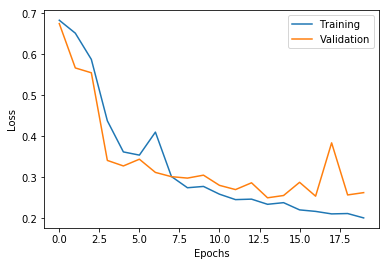

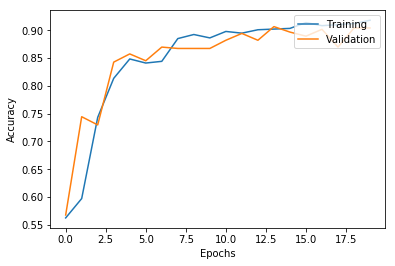

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='upper right')

In [70]:
#cnn deeper with different kernel shapes (try to beat 92%)
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 71, 112, 128)      36992     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 70, 111, 64)       32832     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 55, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 33, 53, 64)        36928     
_________________________________________________________________
dropout_35 (Dropout)         (None, 33, 53, 64)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 33, 53, 32)        2080      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 26, 32)        0         
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 55s - loss: 0.6892 - acc: 0.5526 - val_loss: 0.6850 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 55s - loss: 0.6747 - acc: 0.5673 - val_loss: 0.6982 - val_acc: 0.5672
Epoch 3/20
1634/1634 [==============================] - 56s - loss: 0.6438 - acc: 0.6034 - val_loss: 0.5408 - val_acc: 0.8289
Epoch 4/20
1634/1634 [==============================] - 56s - loss: 0.4886 - acc: 0.7687 - val_loss: 0.4077 - val_acc: 0.8313
Epoch 5/20
1634/1634 [==============================] - 55s - loss: 0.3792 - acc: 0.8335 - val_loss: 0.3332 - val_acc: 0.8729
Epoch 6/20
1634/1634 [==============================] - 55s - loss: 0.3496 - acc: 0.8574 - val_loss: 0.3969 - val_acc: 0.8142
Epoch 7/20
1634/1634 [==============================] - 56s - loss: 0.3404 - acc: 0.8684 - val_loss: 0.2962 - val_acc: 0.8655
Epoch 8/20
1634/1634 [==============================] - 56s - loss: 0.2

1636/1636 [==============================] - 56s - loss: 0.2552 - acc: 0.9028 - val_loss: 0.2718 - val_acc: 0.8821
Epoch 15/20
1636/1636 [==============================] - 56s - loss: 0.2360 - acc: 0.9059 - val_loss: 0.3167 - val_acc: 0.8698
Epoch 16/20
1636/1636 [==============================] - 56s - loss: 0.2223 - acc: 0.9083 - val_loss: 0.2494 - val_acc: 0.9066
Epoch 17/20
1636/1636 [==============================] - 56s - loss: 0.2250 - acc: 0.9077 - val_loss: 0.2524 - val_acc: 0.9115
Epoch 18/20
1636/1636 [==============================] - 56s - loss: 0.2072 - acc: 0.9211 - val_loss: 0.2518 - val_acc: 0.9091
Epoch 19/20
1636/1636 [==============================] - 56s - loss: 0.2146 - acc: 0.9108 - val_loss: 0.2644 - val_acc: 0.9066
Epoch 20/20
1636/1636 [==============================] - 56s - loss: 0.2050 - acc: 0.9175 - val_loss: 0.2463 - val_acc: 0.9115
Epoch 1/20
1636/1636 [==============================] - 68s - loss: 0.1055 - acc: 0.9621    
Epoch 2/20
1636/1636 [========

0.91042584434654916

### `accuracy_score(Y_test, cls_predictions)`:0.91042584434654916

In [41]:
#cnn deeper with different kernel shapes (try to beat 92%) and just 2 Cojnv layers
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 73, 113, 128)      20864     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 111, 64)       73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 55, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 35, 55, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 53, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 26, 32)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 16, 26, 2070)      68310     
__________

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 178s - loss: 0.6256 - acc: 0.6873 - val_loss: 0.5838 - val_acc: 0.7139
Epoch 2/20
1634/1634 [==============================] - 178s - loss: 0.5499 - acc: 0.7736 - val_loss: 0.3902 - val_acc: 0.8460
Epoch 3/20
1634/1634 [==============================] - 178s - loss: 0.4084 - acc: 0.8348 - val_loss: 0.4391 - val_acc: 0.7800
Epoch 4/20
1634/1634 [==============================] - 178s - loss: 0.5307 - acc: 0.8403 - val_loss: 1.9354 - val_acc: 0.7482
Epoch 5/20
1634/1634 [==============================] - 178s - loss: 0.5217 - acc: 0.8433 - val_loss: 1.3314 - val_acc: 0.6479
Epoch 6/20
1634/1634 [==============================] - 178s - loss: 0.4623 - acc: 0.8605 - val_loss: 0.3259 - val_acc: 0.8826
Epoch 7/20
1634/1634 [==============================] - 178s - loss: 0.3045 - acc: 0.8819 - val_loss: 0.4331 - val_acc: 0.8337
Epoch 8/20
1634/1634 [==============================] - 178s - l

1636/1636 [==============================] - 179s - loss: 0.1952 - acc: 0.9193 - val_loss: 0.3613 - val_acc: 0.8870
Epoch 17/20
1636/1636 [==============================] - 179s - loss: 0.1933 - acc: 0.9156 - val_loss: 0.3083 - val_acc: 0.8943
Epoch 18/20
1636/1636 [==============================] - 179s - loss: 0.2164 - acc: 0.9187 - val_loss: 0.2913 - val_acc: 0.9017
Epoch 19/20
1636/1636 [==============================] - 179s - loss: 0.1809 - acc: 0.9267 - val_loss: 0.2813 - val_acc: 0.8968
Epoch 20/20
1636/1636 [==============================] - 179s - loss: 0.1809 - acc: 0.9322 - val_loss: 0.3288 - val_acc: 0.8870
Epoch 1/20
1636/1636 [==============================] - 165s - loss: 0.2109 - acc: 0.9205   
Epoch 2/20
1636/1636 [==============================] - 165s - loss: 0.2063 - acc: 0.9199   
Epoch 3/20
1636/1636 [==============================] - 164s - loss: 0.1949 - acc: 0.9187   
Epoch 4/20
1636/1636 [==============================] - 165s - loss: 0.1849 - acc: 0.9322   


0.88693098384728342

### conv 1 d : doesn't work
NB: needs X_ch_sum which is defined later

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ch_sum, Y, test_size=0.25, random_state=42)
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'Y_train: ', Y_train.shape, 'Y_test: ', Y_test.shape)
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)
num_classes=2

('X_train: ', (2043, 115, 18), 'X_test: ', (681, 115, 18), 'Y_train: ', (2043,), 'Y_test: ', (681,))
(115, 18)


In [148]:
for train_index, validation_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", validation_index)
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)
    
    history = model.fit(Xtrain, Ytrain, batch_size=128,
                        epochs=20, verbose=1,
                        validation_data = (Xvalidation, Yvalidation))
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model
Ytrain = np_utils.to_categorical(ytrain)
best_model.fit(Xtrain, Ytrain, batch_size=115, epochs=20)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, cls_predictions)

('TRAIN:', array([ 400,  404,  405, ..., 2040, 2041, 2042]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 113, 128)          7040      
_________________________________________________________________
dropout_44 (Dropout)         (None, 113, 128)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 111, 64)           24640     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 109, 32)           6176      
_________________________________________________________________
dropout_45 (Dropout)         (None, 109, 32)           0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 3488)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 6978      
Total para

KeyboardInterrupt: 

### also try: sklearn.preprocessing.StandardScaler to apply feature scaling at the beginning ( because of the sparse matrices)

### 2 convoluzioni + altri layer
#### aggiungere traslazioni e rotazioni
#### controllare parametri di training

### Data augmentation

ch_id_numu, dom_id_numu, trig_numu, times_numu = import_trees(numufile)
ch_id_nue, dom_id_nue, trig_nue, times_nue = import_trees(nuefile)

## Try to plot data set (X_train) 

In [82]:
X_train[0].shape

(75, 115, 18)

In [39]:
def sum_times(evt):
    summed_X = np.sum(X[evt], axis=0)
    #print(summed_X.shape, Y[evt])
    return summed_X

In [40]:
X.shape

(2724, 75, 115, 18)

In [113]:
X_ch_sum = np.asarray([sum_times(evt) for evt in range(X.shape[0])])

In [114]:
X_ch_sum.shape

(2724, 115, 18)

In [49]:
np.where(Y==0.0)

(array([1541, 1542, 1543, ..., 2721, 2722, 2723]),)

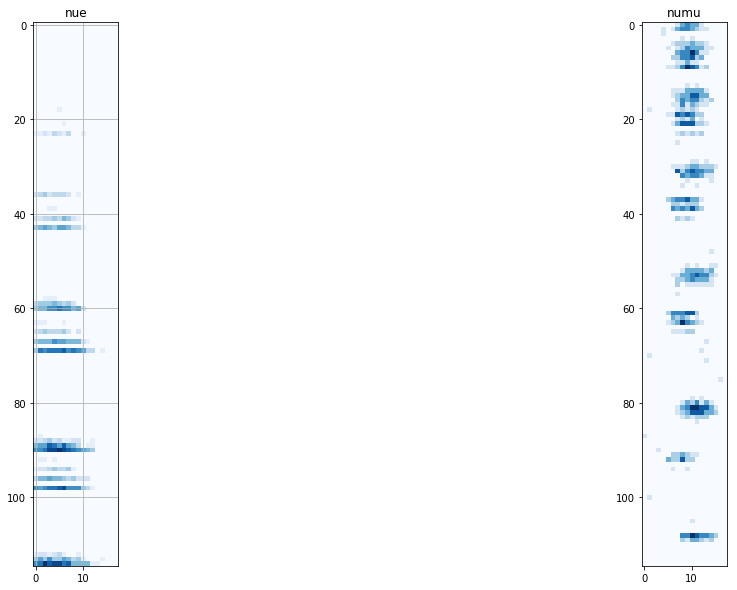

In [133]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

# Displaying the first training data
fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#for numu, put evt number < 1541
#img2 = ax2.imshow(sum_times(1500), cmap=mpl.cm.Blues)
img2 = ax2.imshow(X_ch_sum[1500], cmap=mpl.cm.Blues)
#for nue, put 1541< evt number < 2723 
imgplot = ax.imshow(X_ch_sum[2720], cmap=mpl.cm.Blues)

imgplot.set_interpolation('nearest')
img2.set_interpolation('nearest')
#ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
ax.set_title("nue")
ax2.set_title("numu")
ax.grid()

pyplot.show()

In [51]:
sum_times(1500)[sum_times(1500)!=0]

((115, 18), 1.0)
((115, 18), 1.0)


array([ 1.,  3.,  4.,  3.,  3.,  1.,  1.,  1.,  3.,  4.,  4.,  3.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  2.,  2.,  1.,
        1.,  1.,  2.,  4.,  3.,  3.,  3.,  1.,  1.,  3.,  4.,  4.,  6.,
        4.,  1.,  1.,  2.,  2.,  4.,  4.,  5.,  2.,  3.,  1.,  1.,  3.,
        1.,  1.,  1.,  1.,  2.,  4.,  6.,  5.,  4.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  3.,  3.,  3.,  3.,  1.,  1.,  2.,  3.,  3.,  5.,
        5.,  3.,  3.,  2.,  4.,  3.,  4.,  4.,  2.,  1.,  2.,  1.,  1.,
        4.,  1.,  3.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,
        1.,  5.,  4.,  5.,  4.,  2.,  2.,  1.,  2.,  1.,  3.,  1.,  1.,
        3.,  5.,  5.,  5.,  2.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  3.,  2.,  2.,  2.,
        1.,  5.,  2.,  4.,  5.,  4.,  4.,  3.,  3.,  4.,  3.,  4.,  4.,
        3.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  4.,  4.,  5.,  3.,
        3.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  4.,  3.,  4.,  3

In [52]:
sum_times(2720)[sum_times(2720)!=0]

((115, 18), 0.0)
((115, 18), 0.0)


array([  1.,   1.,   1.,   1.,   2.,   1.,   3.,   2.,   1.,   3.,   1.,
         2.,   3.,   4.,   2.,   3.,   3.,   3.,   2.,   1.,   1.,   1.,
         2.,   2.,   3.,   3.,   4.,   3.,   5.,   4.,   2.,   1.,   4.,
         5.,   6.,   5.,   4.,   6.,   6.,   5.,   3.,   3.,   1.,   1.,
         1.,   1.,   3.,   4.,   4.,   4.,   5.,   4.,   3.,   4.,   2.,
         4.,   5.,   5.,   7.,   7.,   8.,   7.,   7.,   5.,   6.,   2.,
         1.,   1.,   1.,   1.,   2.,   3.,   4.,   3.,   3.,   3.,   4.,
         2.,   2.,   4.,   5.,   5.,   5.,   7.,   6.,   6.,   5.,   5.,
         5.,   2.,   1.,   4.,   8.,   7.,   8.,   8.,   8.,   9.,   7.,
         8.,   7.,   6.,   3.,   3.,   1.,   1.,   2.,   2.,   3.,   4.,
         2.,   3.,   1.,   1.,   2.,   2.,   1.,   5.,   6.,   6.,   9.,
         8.,   6.,   9.,   6.,   5.,   3.,   1.,   1.,   7.,   7.,   8.,
        10.,  10.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   1.,
         1.,   1.,   1.,   2.,   2.,   3.,   4.,   

### try Convolution 1D with `X_ch_sum`

In [141]:
X_ch_sum.shape

(2724, 115, 18)

In [119]:
Y.shape

(2724,)

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ch_sum, Y, test_size=0.25, random_state=42)
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'Y_train: ', Y_train.shape, 'Y_test: ', Y_test.shape)

('X_train: ', (2043, 115, 18), 'X_test: ', (681, 115, 18), 'Y_train: ', (2043,), 'Y_test: ', (681,))


In [152]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes=2
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

In [155]:
import keras
from keras.models import Sequential
from keras.layers.core import Dropout, Activation, Flatten, Dense
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
model = Sequential()
model.add(Convolution1D(64, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Convolution1D(32, kernel_size=2, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(16, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 114, 64)           2368      
_________________________________________________________________
dropout_50 (Dropout)         (None, 114, 64)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 113, 32)           4128      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 111, 16)           1552      
_________________________________________________________________
dropout_51 (Dropout)         (None, 111, 16)           0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1776)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 3554      
Total para

In [156]:
network_history_conv1D = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_test, Y_test), 
                            callbacks=[early_stop])

Train on 2043 samples, validate on 681 samples
Epoch 1/20
2043/2043 [==============================] - 0s - loss: 0.6916 - acc: 0.5634 - val_loss: 0.6892 - val_acc: 0.5609
Epoch 2/20
2043/2043 [==============================] - 0s - loss: 0.6865 - acc: 0.5673 - val_loss: 0.6856 - val_acc: 0.5609
Epoch 3/20
2043/2043 [==============================] - 0s - loss: 0.6847 - acc: 0.5673 - val_loss: 0.6855 - val_acc: 0.5609
Epoch 4/20
2043/2043 [==============================] - 0s - loss: 0.6842 - acc: 0.5673 - val_loss: 0.6854 - val_acc: 0.5609
Epoch 5/20
2043/2043 [==============================] - 0s - loss: 0.6841 - acc: 0.5673 - val_loss: 0.6855 - val_acc: 0.5609
Epoch 6/20
2043/2043 [==============================] - 0s - loss: 0.6828 - acc: 0.5673 - val_loss: 0.6854 - val_acc: 0.5609
Epoch 00005: early stopping


### without cross validation

In [56]:
early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
model = Sequential()
model.add(Dense(2070, input_shape=((X_train.shape[1], X_train.shape[2]*X_train.shape[3])), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2070, activation = 'relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 75, 2070)          4286970   
_________________________________________________________________
dropout_23 (Dropout)         (None, 75, 2070)          0         
_________________________________________________________________
dense_13 (Dense)             (None, 75, 2070)          4286970   
_________________________________________________________________
flatten_12 (Flatten)         (None, 155250)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 310502    
Total params: 8,884,442
Trainable params: 8,884,442
Non-trainable params: 0
_________________________________________________________________


In [36]:
network_history = model.fit(X_train, Y_train, batch_size=115, 
                            epochs=20, verbose=1, validation_data=(X_test, y_test), 
                            callbacks=[early_stop])

Train on 2179 samples, validate on 545 samples
Epoch 1/20
2179/2179 [==============================] - 70s - loss: 0.6807 - acc: 0.6241 - val_loss: 0.6701 - val_acc: 0.5908
Epoch 2/20
2179/2179 [==============================] - 70s - loss: 0.6575 - acc: 0.6416 - val_loss: 0.6522 - val_acc: 0.7009
Epoch 3/20
2179/2179 [==============================] - 70s - loss: 0.6377 - acc: 0.7531 - val_loss: 0.6363 - val_acc: 0.7303
Epoch 4/20
2179/2179 [==============================] - 71s - loss: 0.6207 - acc: 0.7568 - val_loss: 0.6224 - val_acc: 0.7486
Epoch 5/20
2179/2179 [==============================] - 71s - loss: 0.6054 - acc: 0.7655 - val_loss: 0.6098 - val_acc: 0.7596
Epoch 6/20
2179/2179 [==============================] - 72s - loss: 0.5915 - acc: 0.7715 - val_loss: 0.5983 - val_acc: 0.7670
Epoch 7/20
2179/2179 [==============================] - 72s - loss: 0.5790 - acc: 0.7774 - val_loss: 0.5877 - val_acc: 0.7743
Epoch 8/20
2179/2179 [==============================] - 72s - loss: 0.5

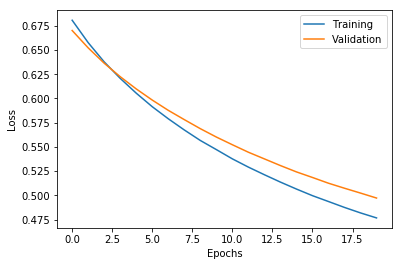

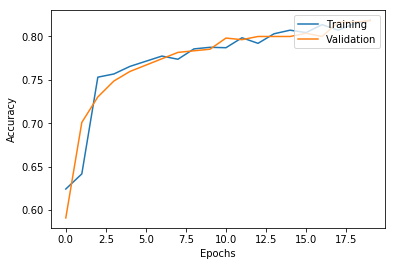

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(network_history.history['loss'])
plt.plot(network_history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(network_history.history['acc'])
plt.plot(network_history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='upper right')

In [51]:
loss = np.load('history.npy').item()['loss']

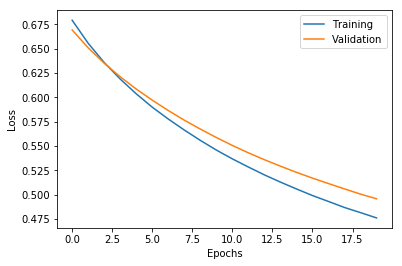

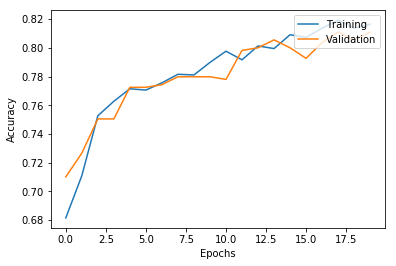

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(np.load('history.npy').item()['loss'])
plt.plot(np.load('history.npy').item()['val_loss'])

plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.load('history.npy').item()['acc'])
plt.plot(np.load('history.npy').item()['val_acc'])

plt.legend(['Training', 'Validation'], loc='upper right')

### Try with a different kind of network

In [25]:
import keras
from keras.models import Sequential
from keras.layers.core import Dropout, Activation, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

## CLEAR SESSION 

#### Free Memory on GPU

```python

from keras import backend as K

K.clear_session()
```

In [44]:
from keras import backend as K

K.clear_session()

AttributeError: 'module' object has no attribute 'clear_session'

In [26]:
X_train.shape

(2043, 74, 115, 18)

In [27]:
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channel = X_train.shape[3]
input_shape = (img_rows, img_cols, img_channel)
num_classes = 2
batch_size = 128

In [ ]:
#try with new dataset
#img_rows = X_train.shape[1]
#img_cols = X_train.shape[2]
input_shape = (img_rows, img_cols, 1)
num_classes = 2
batch_size = 128

In [35]:
x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

In [75]:
#try with new dataset
#x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

In [29]:
import keras
from keras.models import Sequential
from keras.layers.core import Dropout, Activation, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
model = Sequential()
model.add(Convolution2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()


#hist = model.fit(x_train, y_train,
#          batch_size=batch_size,
#          epochs=20,
#          verbose=1,
#validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 53, 5)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8480)              0         
__________

In [72]:
network_history3 = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=10, verbose=1, validation_data=(X_test, Y_test), 
                            callbacks=[early_stop])

ValueError: Error when checking target: expected dense_29 to have 4 dimensions, but got array with shape (2043, 1)

In [40]:
network_history4 = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_test, Y_test), 
                            callbacks=[early_stop])

Train on 2043 samples, validate on 681 samples
Epoch 1/20
2043/2043 [==============================] - 95s - loss: 0.2108 - acc: 0.9173 - val_loss: 0.2793 - val_acc: 0.9060
Epoch 2/20
2043/2043 [==============================] - 95s - loss: 0.1970 - acc: 0.9241 - val_loss: 0.2604 - val_acc: 0.9119
Epoch 3/20
2043/2043 [==============================] - 95s - loss: 0.2019 - acc: 0.9217 - val_loss: 0.2789 - val_acc: 0.9090
Epoch 4/20
2043/2043 [==============================] - 95s - loss: 0.1836 - acc: 0.9320 - val_loss: 0.2671 - val_acc: 0.9119
Epoch 5/20
2043/2043 [==============================] - 94s - loss: 0.1802 - acc: 0.9310 - val_loss: 0.2636 - val_acc: 0.9090
Epoch 6/20
2043/2043 [==============================] - 94s - loss: 0.1759 - acc: 0.9315 - val_loss: 0.2665 - val_acc: 0.9134
Epoch 7/20
2043/2043 [==============================] - 95s - loss: 0.3819 - acc: 0.8918 - val_loss: 0.2892 - val_acc: 0.9060
Epoch 8/20
2043/2043 [==============================] - 95s - loss: 0.1

In [76]:
network_history4 = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_test, Y_test), 
                            callbacks=[early_stop])

INFO (theano.gof.compilelock): Refreshing lock /home/cdesio/.theano/compiledir_Linux-4.2--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir/lock


Train on 2043 samples, validate on 681 samples
Epoch 1/20
2043/2043 [==============================] - 6s - loss: 0.6836 - acc: 0.5580 - val_loss: 0.6792 - val_acc: 0.5609
Epoch 2/20
2043/2043 [==============================] - 6s - loss: 0.6539 - acc: 0.5673 - val_loss: 0.6352 - val_acc: 0.5609
Epoch 3/20
2043/2043 [==============================] - 6s - loss: 0.5546 - acc: 0.7171 - val_loss: 0.4934 - val_acc: 0.8576
Epoch 4/20
2043/2043 [==============================] - 6s - loss: 0.4683 - acc: 0.8169 - val_loss: 0.4070 - val_acc: 0.8634
Epoch 5/20
2043/2043 [==============================] - 6s - loss: 0.3493 - acc: 0.8767 - val_loss: 0.3370 - val_acc: 0.8590
Epoch 6/20
2043/2043 [==============================] - 6s - loss: 0.3281 - acc: 0.8634 - val_loss: 0.2994 - val_acc: 0.8840
Epoch 7/20
2043/2043 [==============================] - 6s - loss: 0.2729 - acc: 0.8982 - val_loss: 0.2745 - val_acc: 0.8869
Epoch 8/20
2043/2043 [==============================] - 6s - loss: 0.2521 - ac

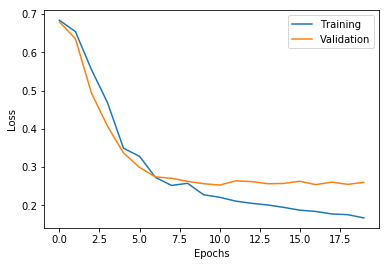

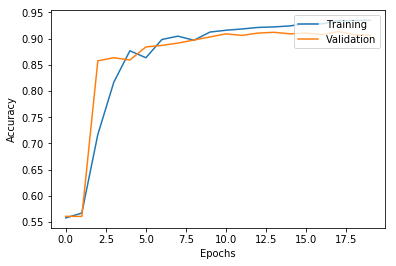

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(network_history4.history['loss'])
plt.plot(network_history4.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(network_history4.history['acc'])
plt.plot(network_history4.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='upper right')

In [80]:
early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
model = Sequential()
model.add(Convolution2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 128, 113, 16)      86528     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 64, 111, 14)       73792     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 55, 7)         0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 64, 55, 7)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 53, 5)         18464     
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 53, 5)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 51, 3)         9248      
__________

In [81]:
network_history5 = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_test, Y_test), 
                            callbacks=[early_stop])

Train on 2043 samples, validate on 681 samples
Epoch 1/20
2043/2043 [==============================] - 6s - loss: 0.6854 - acc: 0.5629 - val_loss: 0.6795 - val_acc: 0.5609
Epoch 2/20
2043/2043 [==============================] - 6s - loss: 0.6694 - acc: 0.5673 - val_loss: 0.6606 - val_acc: 0.5609
Epoch 3/20
2043/2043 [==============================] - 6s - loss: 0.6081 - acc: 0.5898 - val_loss: 0.5763 - val_acc: 0.7137
Epoch 4/20
2043/2043 [==============================] - 6s - loss: 0.5196 - acc: 0.7513 - val_loss: 0.4580 - val_acc: 0.8267
Epoch 5/20
2043/2043 [==============================] - 6s - loss: 0.4140 - acc: 0.8169 - val_loss: 0.3527 - val_acc: 0.8458
Epoch 6/20
2043/2043 [==============================] - 6s - loss: 0.3214 - acc: 0.8757 - val_loss: 0.2873 - val_acc: 0.8634
Epoch 7/20
2043/2043 [==============================] - 6s - loss: 0.3345 - acc: 0.8629 - val_loss: 0.2680 - val_acc: 0.8825
Epoch 8/20
2043/2043 [==============================] - 6s - loss: 0.2680 - ac

###VGG16

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


# Test pretrained model
model = VGG_16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

network_history1 = model.fit(X_train, y_train, batch_size=115, 
                            epochs=20, verbose=1, validation_data=(X_test, y_test), 
                            callbacks=[early_stop])
